In [1]:
import os
import sys
import pandas as pd
# !{sys.executable} -m pip install python-csv
# !{sys.executable} -m pip install --upgrade pip
# !{sys.executable} -m pip install pandas;
# print(pd.__version__)

In [2]:
from lib.display import Display
from lib.database import Database
from lib.schema import Schema

db = Database(Schema.EXAMPLE_STUDY)   
Display.header('EXAMPLE study on ALP', 'h1')

Display.header('Participants', 'h3')
participants_df = db.get_participants()
Display.frame(participants_df, 5)
print('Number of participants:', participants_df.shape[0])

Display.header('Responses', 'h3')
responses_df = db.get_responses()
Display.frame(responses_df.drop(columns=['QUESTIONNAIRE_ID']), 5)
print('Number of responses:', responses_df.shape[0])

,ALP_ID,EXTERNAL_ID,STATUS,START_DATE,END_DATE
0,1017,uninklinik_87,enrolled,2021-02-02,NaT
1,1011,test_user_57,enrolled,2021-02-05,NaT
2,1010,uninklinik_52,enrolled,2021-02-22,NaT
3,1019,uninklinik_97,enrolled,2021-04-07,NaT
4,1003,uninklinik_17,suspended,2021-05-07,2022-03-31


Number of participants: 20


,ALP_ID,VERSION,QUESTIONNAIRE,STATUS,AUTHORED,LINK_ID,VALUE,VALUECODING_CODE,LANGUAGE,TEXT
0,1001,1.0.0,S1,completed,2021-08-22,Sex,NaN,female,de,Welches Geschlecht wurde bei Ihrer Geburt in Ihre Geburtsurkunde eingetragen?
1,1001,1.0.0,S1,completed,2021-08-22,Sex_A,NaN,diverse,de,Da sich nicht alle Menschen ihrem eingetragenen Geschlecht zugehörig fühlen: Welchem Geschlecht fühlen Sie sich zugehörig?
2,1001,1.0.0,S1,completed,2021-08-22,Gebm_Gebj,1933-05,NaN,de,"Wann sind Sie geboren? Bitte geben Sie den Monat und das Jahr an, in dem Sie geboren wurden."
3,1001,1.0.0,S1,completed,2021-08-22,HS1,NaN,moderate,de,Wie ist Ihr Gesundheitszustand im Allgemeinen? Er ist...
4,1001,1.0.0,S1,completed,2021-08-22,CD1A,NaN,no,de,Es geht nun um dauerhafte Krankheiten und chronische Gesundheitsprobleme. Bitte berücksichtigen Sie dabei keine vorübergehenden gesundheitlichen Probleme. Hatten Sie in den letzten 12 Monaten eine der folgenden Krankheiten oder Beschwerden? Arthrose. Nicht gemeint ist Arthritis bzw. Gelenksentzündung.


Number of responses: 406


In [6]:
from lib.studies.rki_panel_study import RkiPanelStudy
from lib.participant_builder import ParticipantsBuilder

builder = ParticipantsBuilder(RkiPanelStudy(), participants_df, responses_df)
df = builder \
    .add_last_donation() \
    .add_all_submissions() \
    .add_choice('S1', 'Sex', 'GENDER') \
    .add_answer('S1', 'Gebm_Gebj', 'BIRTH_DATE') \
    .get()

Display.frame(df, 10)

,ALP_ID,EXTERNAL_ID,STATUS,START_DATE,END_DATE,ENROLED_ON,LAST_DONATION,all,Q1,GENDER,BIRTH_DATE
0,1312,uninklinik_1562,enrolled,2021-01-01,NaT,2021-01-01,2021-01-01,1,1,male,2001-07
1,1018,uninklinik_92,suspended,2021-01-02,2022-03-31,2021-01-02,2021-01-02,1,1,female,1953-07
2,1115,uninklinik_577,enrolled,2021-01-02,NaT,2021-01-02,2021-01-02,1,1,male,1931-06
3,1263,uninklinik_1317,enrolled,2021-01-04,NaT,2021-01-04,2021-01-04,1,1,male,1922-07
4,1143,uninklinik_717,enrolled,2021-01-05,NaT,2021-01-05,2021-01-05,1,1,female,1932-04
5,1356,test_user_1782,enrolled,2021-01-05,NaT,2021-01-05,2021-01-05,1,1,male,1938-08
6,1208,uninklinik_1042,enrolled,2021-01-07,NaT,2021-01-07,2021-01-07,1,1,male,1971-06
7,1476,test_user_2382,enrolled,2021-01-07,NaT,2021-01-07,2021-01-07,1,1,male,1934-01
8,1400,uninklinik_2002,enrolled,2021-01-10,NaT,2021-01-10,2021-01-10,1,1,female,1927-07
9,1437,uninklinik_2187,enrolled,2021-01-10,NaT,2021-01-10,2021-01-10,1,1,male,1935-10


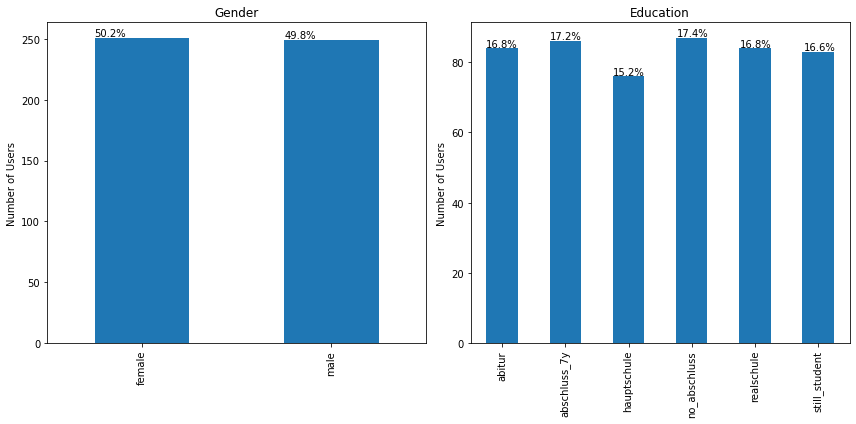

In [7]:
df = ParticipantsBuilder(RkiPanelStudy(), participants_df, responses_df) \
    .add_choice('S1','Sex', 'Gender') \
    .add_choice('S1','HSA1Aa1', 'Education') \
    .get()

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

column_name = 'Gender'
value_counts = df[column_name].value_counts().sort_index()
value_counts.plot(kind="bar", ylabel='Number of Users', title=column_name, ax=ax1)
Display.tag_bars(ax1, df.shape[0])
    
column_name = 'Education'
value_counts = df[column_name].value_counts().sort_index()
value_counts.plot(kind="bar", ylabel='Number of Users', title=column_name, ax=ax2)
Display.tag_bars(ax2, df.shape[0])

Display.header('Participants distribution', 'h2')
fig.tight_layout()